<a href="https://colab.research.google.com/github/mirsaidl/YOLOs/blob/main/YOLO8_smoke_detection_custom_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi

Tue Apr 30 06:09:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from IPython import display
display.clear_output()
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 28.8/78.2 GB disk)


In [7]:
!yolo task = detect mode = train model = yolov8m.pt data=/content/smoke_detection/data.yaml epochs=10 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 220MB/s]
Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/smoke_detection/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

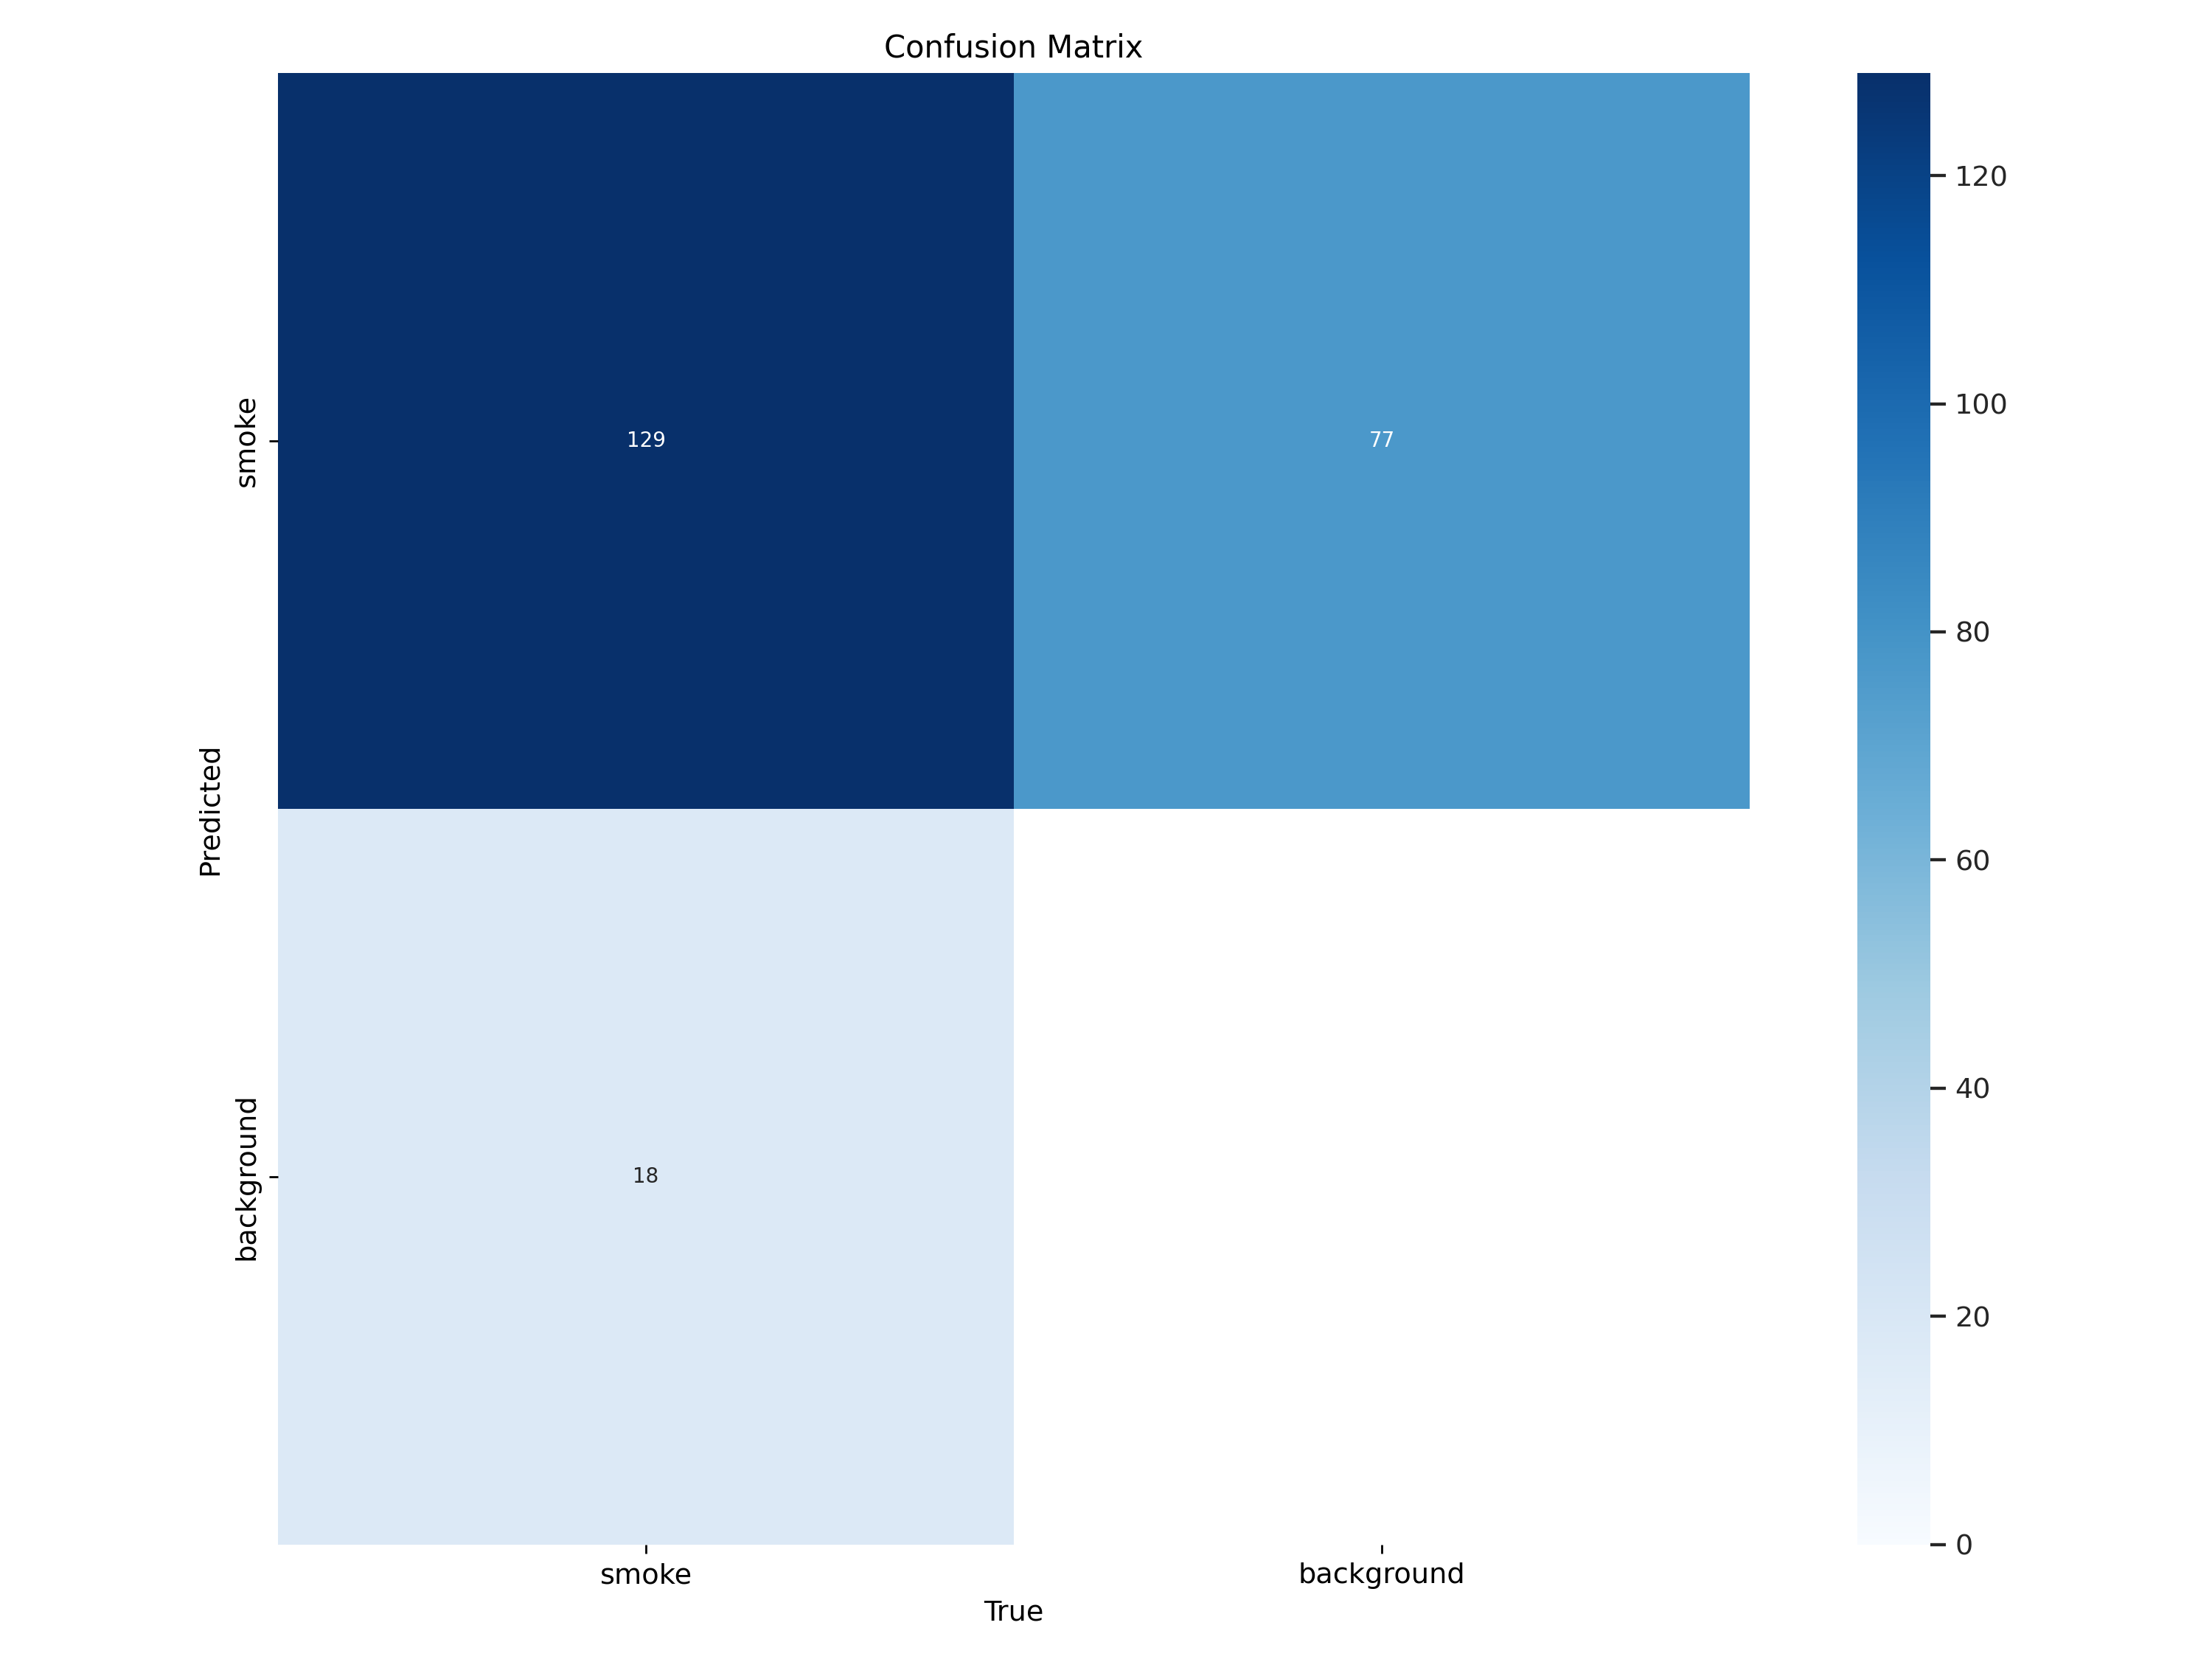

In [12]:
display.Image(filename = f'/content/runs/detect/train/confusion_matrix.png', width=600)

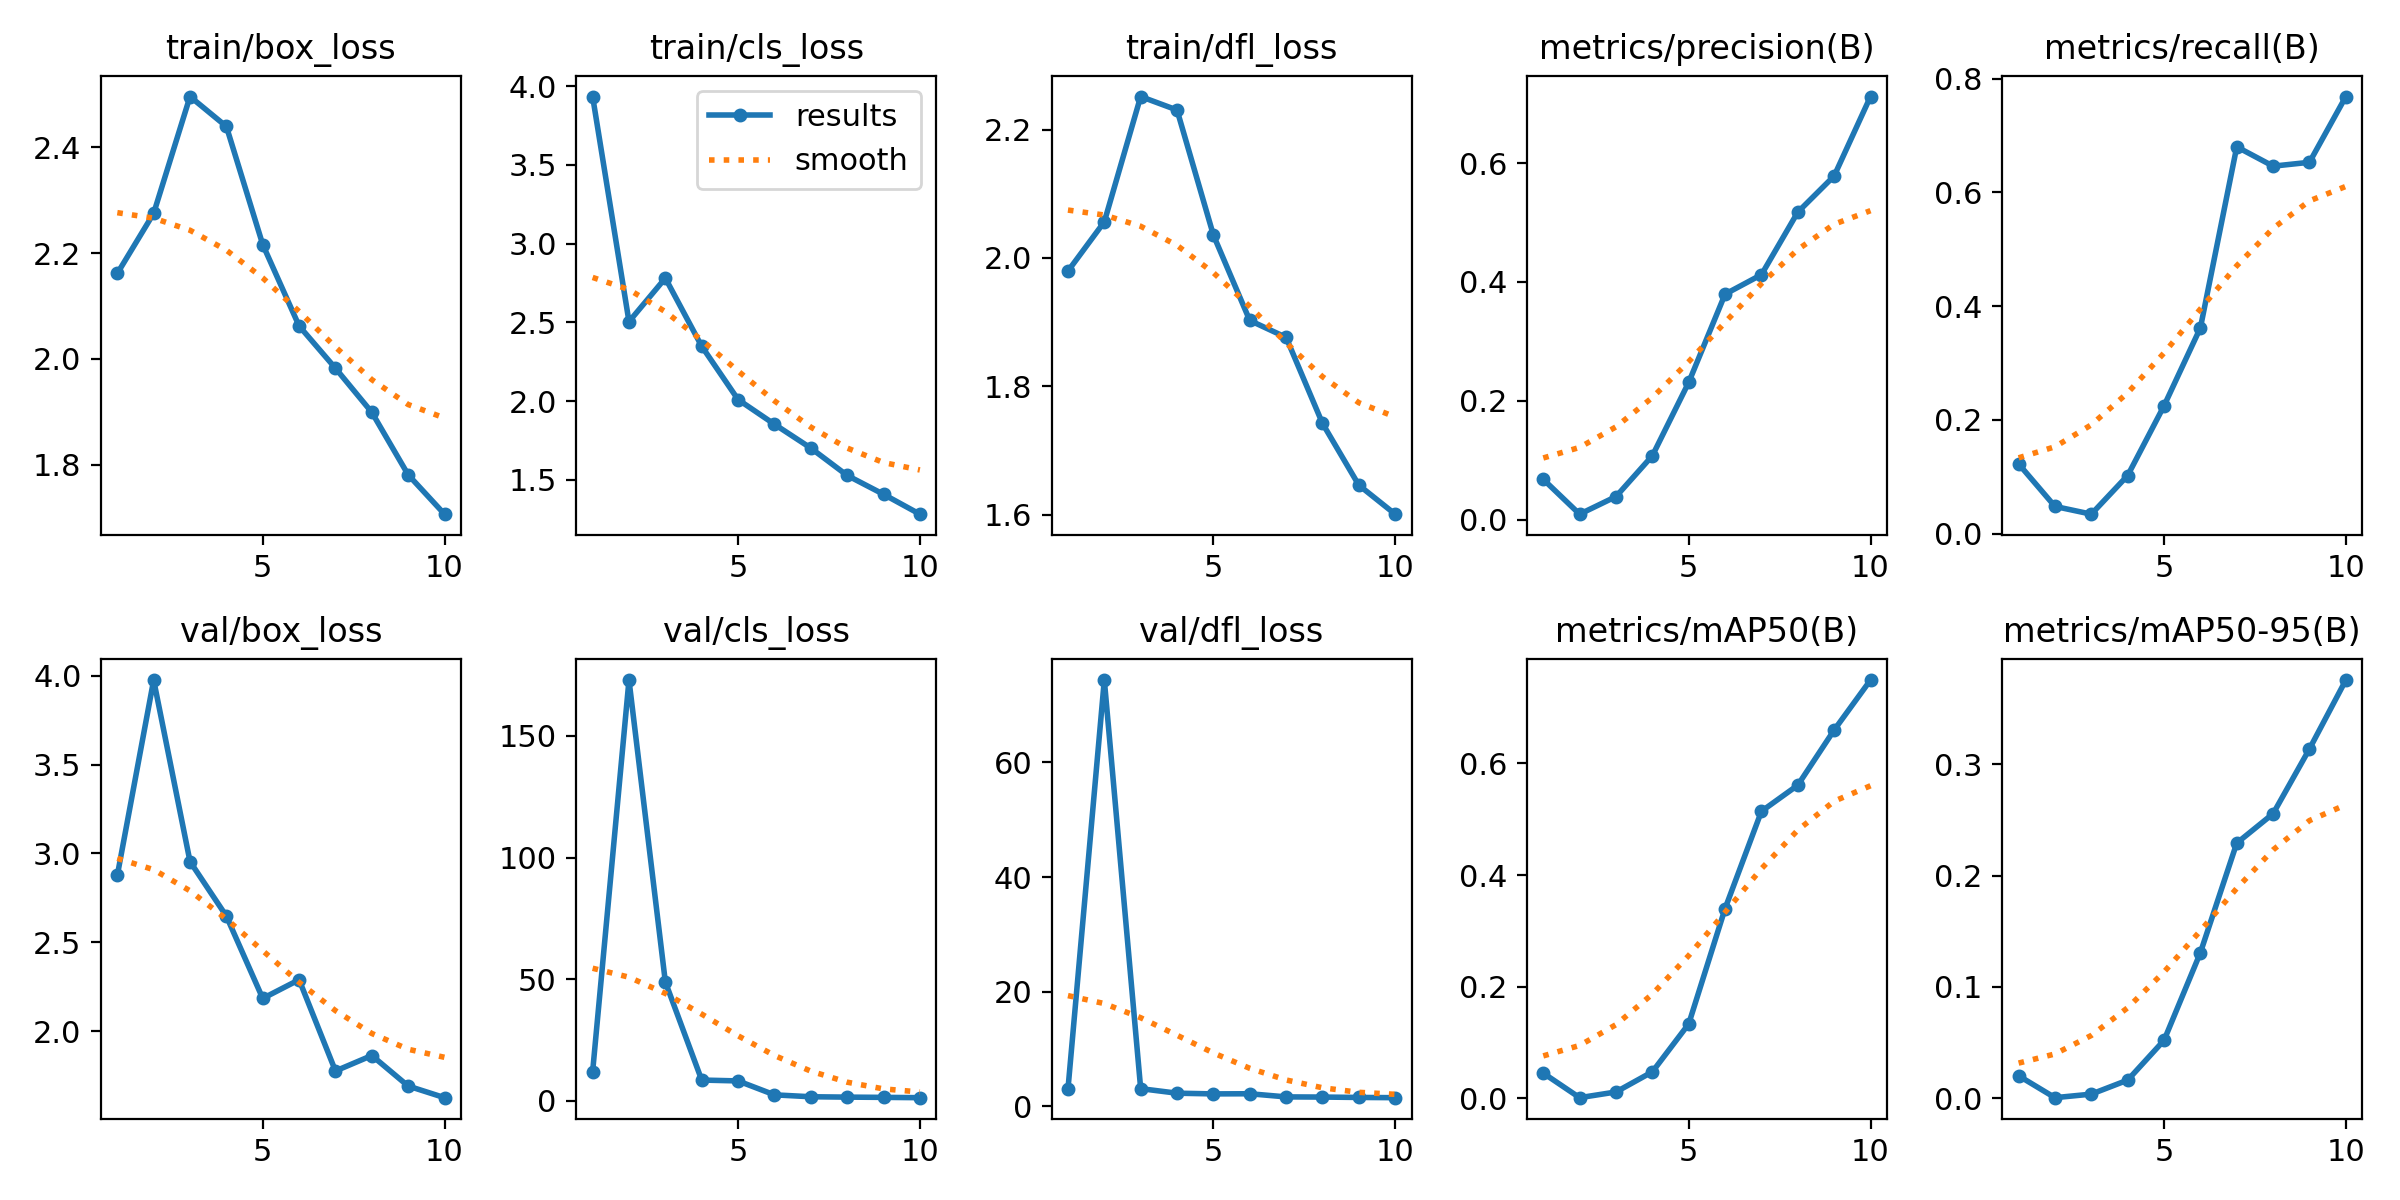

In [13]:
display.Image(filename = f'/content/runs/detect/train/results.png', width=600)

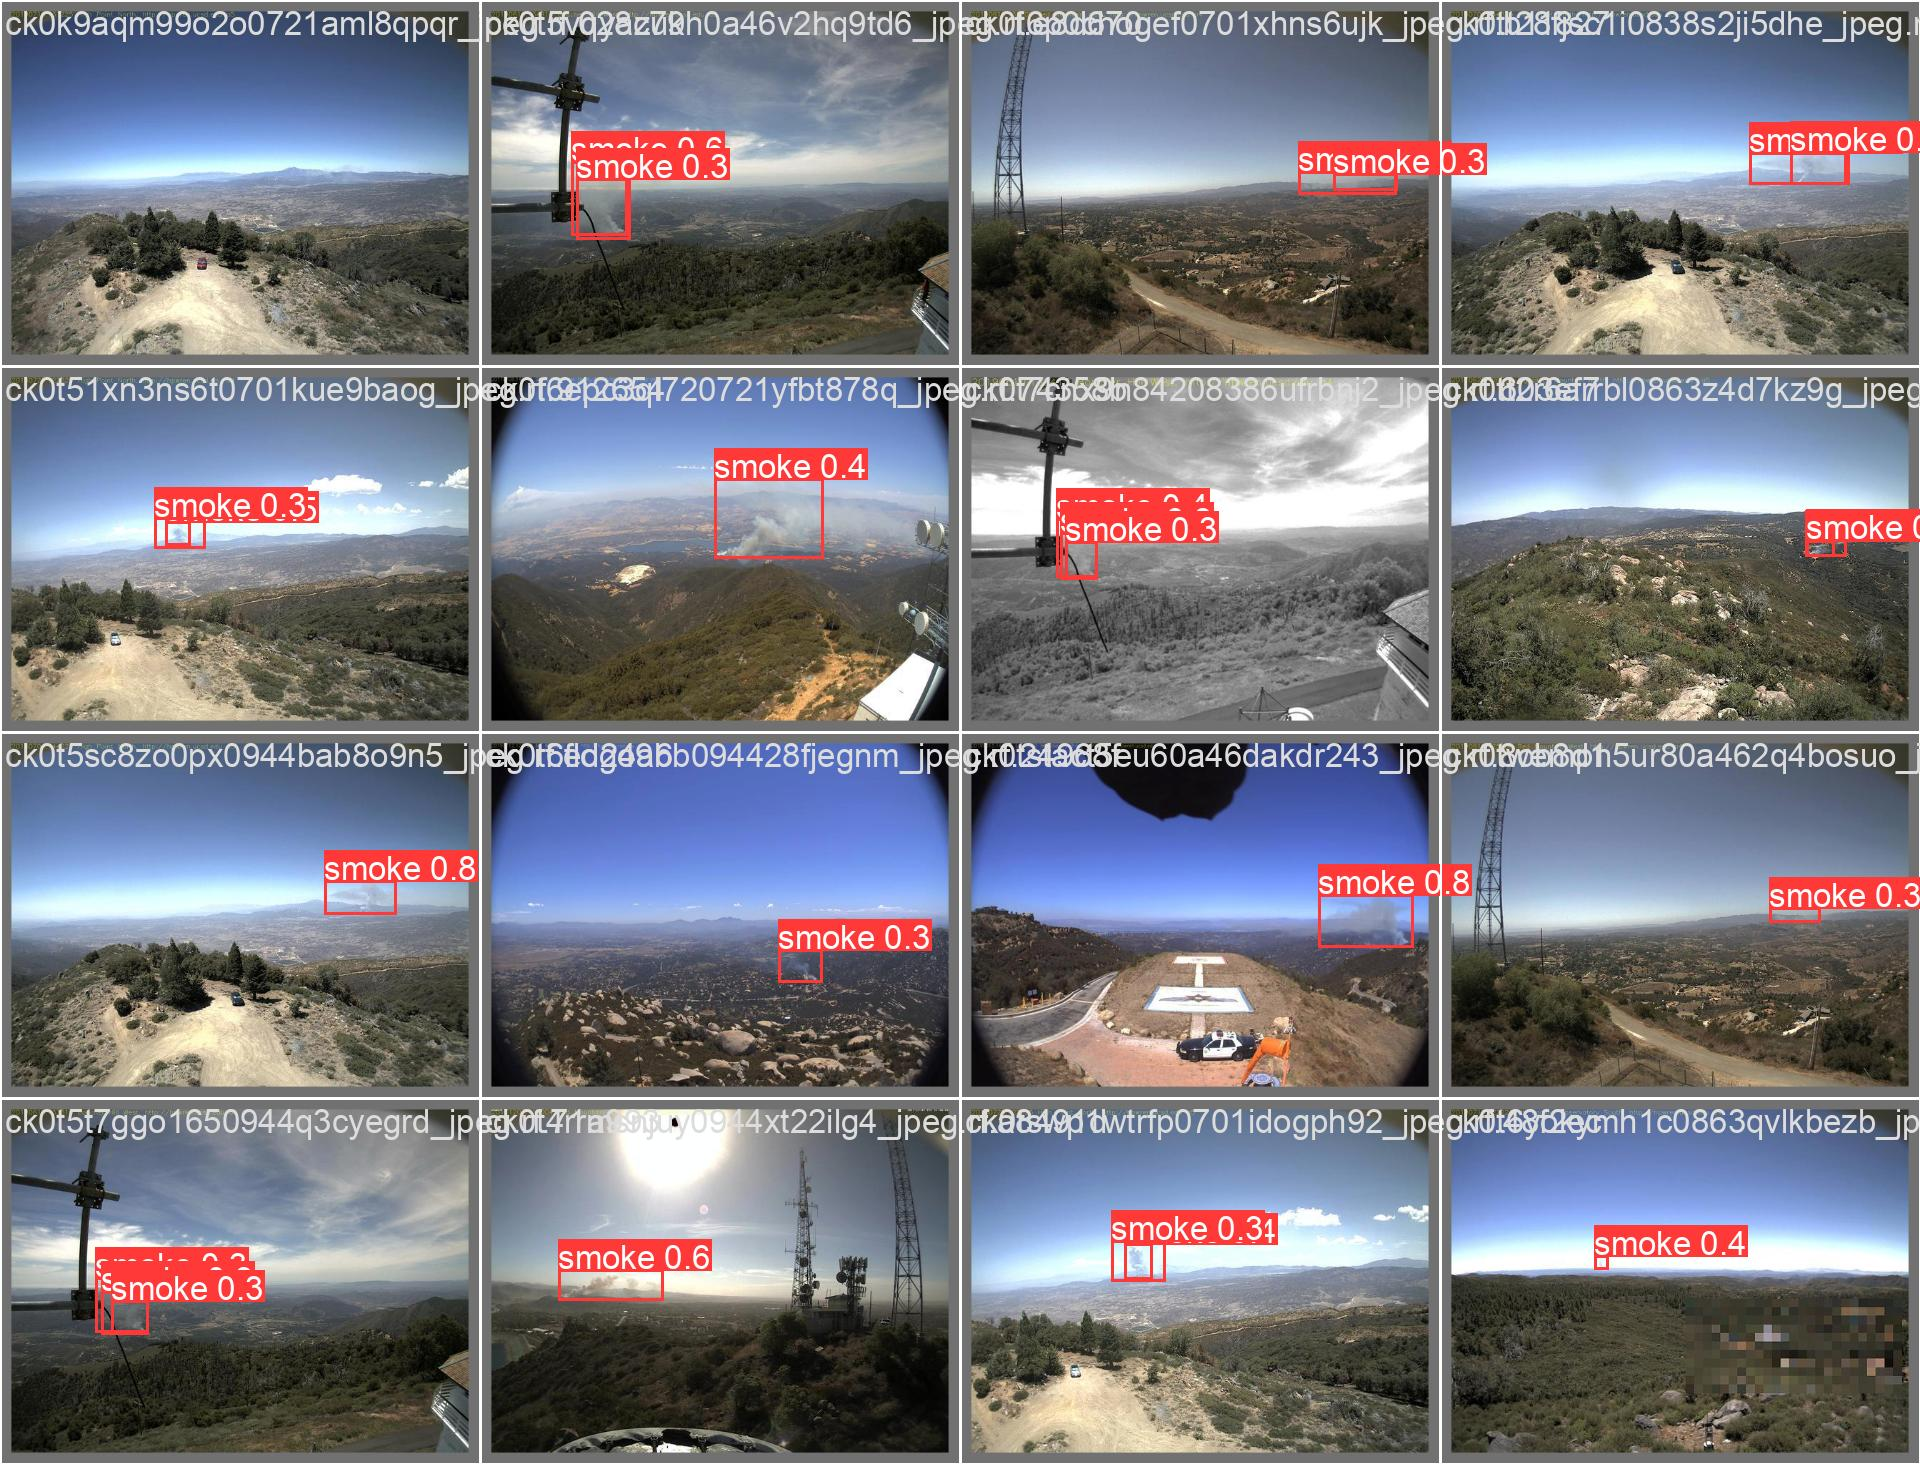

In [14]:
# See one batch of detections
display.Image(filename = f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

In [15]:
!yolo task = detect mode = val model = /content/runs/detect/train/weights/best.pt data=/content/smoke_detection/data.yaml

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/smoke_detection/valid/labels.cache... 147 images, 0 backgrounds, 0 corrupt: 100% 147/147 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:07<00:00,  1.39it/s]
                   all        147        147      0.712      0.769      0.749      0.375
Speed: 1.7ms preprocess, 16.5ms inference, 0.0ms loss, 14.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [16]:
!yolo task = detect mode = predict model = /content/runs/detect/train/weights/best.pt conf = 0.5 source=/content/smoke_detection/data.yaml

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 582, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 452, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 177, in predict_cli
    for _ in gen:  # noqa, running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen.send(None)

### Predicting

In [28]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/smoke.mp4 show=True imgsz=640 name=predictions

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/525) /content/smoke.mp4: 384x640 (no detections), 104.6ms
video 1/1 (frame 2/525) /content/smoke.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 3/525) /content/smoke.mp4: 384x640 (no detections), 25.1ms
video 1/1 (frame 4/525) /content/smoke.mp4: 384x640 (no detections), 25.0ms
video 1/1 (frame 5/525) /content/smoke.mp4: 384x640 (no detections), 24.2ms
video 1/1 (frame 6/525) /content/smoke.mp4: 384x640 (no detections), 23.0ms
video 1/1 (frame 7/525) /content/smoke.mp4: 384x640 (no detections), 23.0ms
video 1/1 (frame 8/525) /content/smoke.mp4: 384x640 (no detections), 23.0ms
video 1/1 (frame 9/525) /content/smoke.mp4: 384x640 (no detections), 23.0ms
video 1/1 (frame 10/525) /content/smoke.mp4: 384x640 (no detections), 23.

In [30]:
!ffmpeg -i /content/runs/detect/predictions/smoke.avi /content/runs/detect/predictions/smoke.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [41]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/smoke_detection/valid/images/ck0k9lqaz4ict0863typf3ngd_jpeg.rf.6a740fd0c445713ba9ab596507348319.jpg show=True imgsz=640 name=predictions

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.2.5 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/smoke_detection/valid/images/ck0k9lqaz4ict0863typf3ngd_jpeg.rf.6a740fd0c445713ba9ab596507348319.jpg: 480x640 2 smokes, 105.8ms
Speed: 2.6ms preprocess, 105.8ms inference, 1881.9ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predictions4
💡 Learn more at https://docs.ultralytics.com/modes/predict


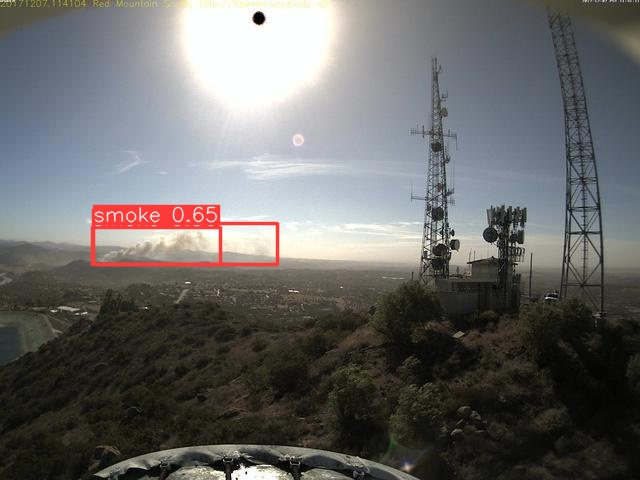

In [43]:
Image('/content/runs/detect/predictions4/ck0k9lqaz4ict0863typf3ngd_jpeg.rf.6a740fd0c445713ba9ab596507348319.jpg')

In [44]:
!zip -r runs.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/predictions4/ (stored 0%)
  adding: content/runs/detect/predictions4/ck0k9lqaz4ict0863typf3ngd_jpeg.rf.6a740fd0c445713ba9ab596507348319.jpg (deflated 5%)
  adding: content/runs/detect/predictions/ (stored 0%)
  adding: content/runs/detect/predictions/smoke.mp4 (deflated 0%)
  adding: content/runs/detect/predictions/smoke.avi (deflated 5%)
  adding: content/runs/detect/predictions3/ (stored 0%)
  adding: content/runs/detect/predictions3/images3.jpg (deflated 7%)
  adding: content/runs/detect/yolov8n_v8_50e_infer1280/ (stored 0%)
  adding: content/runs/detect/yolov8n_v8_50e_infer1280/smoke.mp4 (deflated 0%)
  adding: content/runs/detect/yolov8n_v8_50e_infer1280/smoke.avi (deflated 6%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/results.csv (deflated 82%)
  adding: content/runs/detect/train/val_batch1_pred.jpg (deflated 7%)
  adding: content

In [45]:
from google.colab import files
files.download('runs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>